In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

In [8]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_path = '/kaggle/input/brain-tumor-classification-mri/Training'
test_path = '/kaggle/input/brain-tumor-classification-mri/Testing'

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [10]:
#  a batch of preprocessed data
train_images, train_labels = next(train_generator)
np.save('/kaggle/working/train_images.npy', train_images)
np.save('/kaggle/working/train_labels.npy', train_labels)

In [11]:
# Build custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=12,
    verbose=1
)

Epoch 1/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 34s 433ms/step - accuracy: 0.5887 - loss: 0.9697 - val_accuracy: 0.4695 - val_loss: 1.1319
Epoch 2/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 421ms/step - accuracy: 0.6125 - loss: 0.9387 - val_accuracy: 0.4538 - val_loss: 1.1569
Epoch 3/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 426ms/step - accuracy: 0.6245 - loss: 0.9060 - val_accuracy: 0.4904 - val_loss: 1.0981
Epoch 4/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 421ms/step - accuracy: 0.6124 - loss: 0.9148 - val_accuracy: 0.4468 - val_loss: 1.1648
Epoch 5/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 420ms/step - accuracy: 0.6204 - loss: 0.8974 - val_accuracy: 0.4834 - val_loss: 1.1143
Epoch 6/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 425ms/step - accuracy: 0.6355 - loss: 0.8853 - val_accuracy: 0.4904 - val_loss: 1.1326
Epoch 7/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 420ms/step - accuracy: 0.6237 - loss: 0.8827 - val_accuracy: 0.4485 - val_loss: 1.1935
Epoch 8/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 423ms/step - accuracy: 0.6488 - loss: 0.8696 - val_accu

In [15]:
# Save the model
model.save('/kaggle/working/brain_tumor_model.h5')

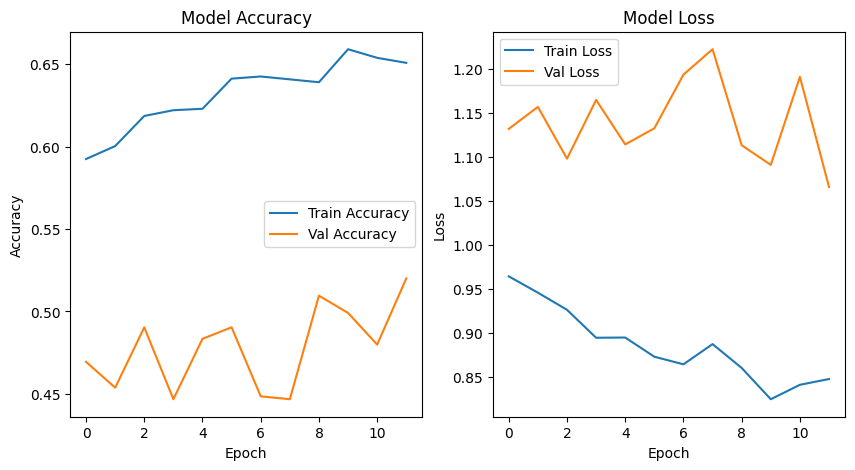

In [16]:
# Visualize training performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('/kaggle/working/accuracy_loss_plot.png')
plt.show()

accuracy_loss_plot.png	train_images.npy
brain_tumor_model.h5	train_labels.npy
